<a href="https://colab.research.google.com/github/DanielRaiicHu/telecom_x_2/blob/main/telecom_x_2.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X - Parte 2**

## **Preparación de los Datos**

### **Extracción del Archivo Tratado**

Se importan y tratan los datos generados en el desafío anterior

In [205]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score, LeaveOneOut

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

import warnings
# Ignoramos mensajes de advertencia para mantener la salida limpia
warnings.filterwarnings('ignore')


In [2]:
url = 'https://raw.githubusercontent.com/DanielRaiicHu/telecom_x_2/main/datos_tratados.csv'
datos = pd.read_csv(url)
datos.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [3]:
datos.shape

(7043, 22)

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [5]:
datos.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


In [6]:
datos.describe(include = 'O')

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,9995-HOTOH,No,Masculino,No,No,No,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque electrónico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [7]:
# Revisión de datos únicos para cada columna
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(datos[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

### **Eliminación de columnas irrelevantes**

In [8]:
datos = datos.drop('ID_Cliente', axis=1)
datos.head()

,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,No,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,No,Masculino,No,No,No,9,Sí,Sí,DSL,No,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,No,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,No,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,No,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


Revisamos que no hayan valores nulos en nuestro dataframe

In [9]:
datos.isnull().sum()

,0
Evasion,0
Genero,0
AdultoMayor,0
TienePareja,0
Dependientes,0
MesesAntiguedad,0
ServicioTelefonico,0
LineasMultiples,0
ServicioInternet,0
SeguridadEnLinea,0


### **Tratamiento de los datos binarios**

In [10]:
# # Trabajaremos sobre una copia para no tocar el DataFrame original
# datos_codificados = datos.copy()

# # Unificamos categorías 'sin servicio' a 'No' en todas las funciones que dependen de tener internet.
# # Esto evita dummies mutuamente excluyentes del tipo '_Sí' y '_Sin servicio de internet'
# cols_internet_dep = [
#     'SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
#     'SoporteTecnico','StreamingTV','StreamingPeliculas'
# ]

# for c in cols_internet_dep:
#     datos_codificados[c] = datos_codificados[c].replace({'Sin servicio de internet':'No'})

# # También unificamos 'Sin servicio telefónico' a 'No' en LíneasMultiples
# # (si no hay servicio telefónico, no puede haber líneas múltiples)
# datos_codificados['LineasMultiples'] = (
#     datos_codificados['LineasMultiples'].replace({'Sin servicio telefónico':'No'})
# )

# # Convertimos binarios 'Sí/No' a 1/0 (incluye la variable objetivo Evasion)
# # Mantener estas columnas como numéricas simplifica el modelado y la medición de VIF
# binarias = [
#     'Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
#     'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
#     'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica'
# ]

# # Dejamos todas las variables tratadas con 0s y 1s
# datos_codificados[binarias] = datos_codificados[binarias].replace({'Sí':1, 'No':0})

# # Codificamos Género en 0/1 (no hay orden natural, solo dos categorías)
# datos_codificados['Genero'] = datos_codificados['Genero'].replace({'Femenino':0,'Masculino':1})


# # Usamos drop_first=True para evitar colinealidad
# # Las variables que siguen siendo tipo objecty las almacena en categoricas_restantes
# categoricas_restantes =  datos_codificados.select_dtypes(include='object').columns.tolist()

# datos_codificados = pd.get_dummies(data = datos_codificados, columns=categoricas_restantes, drop_first=True, dtype=int)



In [11]:
# # Para mantener el orden original de mi dataframe
# datos_codificados = datos_codificados.reindex(
#     columns=sum(
#         [
#             ([c] if c not in categoricas_restantes else
#              [col for col in datos_codificados.columns if col.startswith(f"{c}_")])
#             for c in datos.columns
#         ],[]
#                )
#             )

In [12]:
# import pandas as pd

# # --- 1) tratamiento binario (misma lógica que ya tenías, encapsulada) ---
# def preparar_binarios(df):
#     df = df.copy()

#     # unificar 'Sin servicio de internet' -> 'No'
#     cols_internet_dep = [
#         'SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
#         'SoporteTecnico','StreamingTV','StreamingPeliculas'
#     ]
#     for c in cols_internet_dep:
#         if c in df.columns:
#             df[c] = df[c].replace({'Sin servicio de internet':'No'})

#     # unificar 'Sin servicio telefónico' -> 'No' en LineasMultiples
#     if 'LineasMultiples' in df.columns:
#         df['LineasMultiples'] = df['LineasMultiples'].replace({'Sin servicio telefónico':'No'})

#     # binarios 'Sí/No' -> 1/0 (incluye Evasion si está)
#     binarias = [
#         'Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
#         'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
#         'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica'
#     ]
#     inter = [c for c in binarias if c in df.columns]
#     if inter:
#         df[inter] = df[inter].replace({'Sí':1, 'No':0})

#     # género 0/1
#     if 'Genero' in df.columns:
#         df['Genero'] = df['Genero'].replace({'Femenino':0,'Masculino':1})

#     return df

# # aplicamos el mismo prepro sobre TODO el dataset (como ya hacías)
# datos_codificados = preparar_binarios(datos)

# # --- 2) dummies sobre TODO el dataset (como ya hacías), pero guardando el esquema ---
# categoricas_restantes = datos_codificados.select_dtypes(include='object').columns.tolist()

# datos_codificados = pd.get_dummies(
#     data=datos_codificados,
#     columns=categoricas_restantes,
#     drop_first=True,
#     dtype=int
# )

# # (opcional) mantener el orden “similar” al original, como hacías antes
# datos_codificados = datos_codificados.reindex(
#     columns=sum(
#         [
#             ([c] if c not in categoricas_restantes else
#              [col for col in datos_codificados.columns if col.startswith(f"{c}_")])
#             for c in datos.columns
#         ], []
#     ),
#     fill_value=0
# )

# # --- 3) guardamos el esquema de columnas para usarlo luego con datos nuevos ---
# # incluye 'Evasion' si está presente en datos (lo usas al entrenar)
# esquema_dummies_total = datos_codificados.columns.tolist()
# # y también el esquema SOLO de features (sin la respuesta) por si lo necesitas en producción
# esquema_dummies_X = [c for c in esquema_dummies_total if c != 'Evasion']

# # función auxiliar para transformar cualquier dataframe futuro igual que aquí
# def transformar_como_entrenamiento(df_nuevo, solo_X=False):
#     df_prep = preparar_binarios(df_nuevo)
#     df_dummy = pd.get_dummies(
#         df_prep,
#         columns=[c for c in categoricas_restantes if c in df_prep.columns],
#         drop_first=True,
#         dtype=int
#     )
#     if solo_X:
#         return df_dummy.reindex(columns=esquema_dummies_X, fill_value=0)
#     else:
#         return df_dummy.reindex(columns=esquema_dummies_total, fill_value=0)

In [13]:
# # imports
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # mismo preprocesamiento binario que ya vienes usando
# def preparar_binarios(df):
#     df = df.copy()

#     # unificar "Sin servicio de internet" → "No" en columnas dependientes
#     for c in ['SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
#               'SoporteTecnico','StreamingTV','StreamingPeliculas']:
#         if c in df.columns:
#             df[c] = df[c].replace({'Sin servicio de internet': 'No'})

#     # unificar "Sin servicio telefónico" → "No"
#     if 'LineasMultiples' in df.columns:
#         df['LineasMultiples'] = df['LineasMultiples'].replace({'Sin servicio telefónico': 'No'})

#     # binarios "Sí/No" → 1/0 (incluye Evasion si está)
#     binarias = ['Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
#                 'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
#                 'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica']
#     inter = [c for c in binarias if c in df.columns]
#     if inter:
#         df[inter] = df[inter].replace({'Sí': 1, 'No': 0})

#     # genero a 0/1
#     if 'Genero' in df.columns:
#         df['Genero'] = df['Genero'].replace({'Femenino': 0, 'Masculino': 1})

#     # fuera el id (no se usa para el modelo)
#     df = df.drop(columns=['ID_Cliente'], errors='ignore')
#     return df

# # aplica el prepro binario sobre TODO tu dataset (así mantienes tu flujo actual)
# datos_prep = preparar_binarios(datos)

# # columnas categóricas que todavía son 'object' y sí requieren one-hot
# # (en tu caso típicamente: ServicioInternet, TipoContrato, MetodoPago)
# cols_cat = datos_prep.select_dtypes(include='object').columns.tolist()

# # one-hot robusto (ignora categorías nuevas en producción)
# try:
#     ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
# except TypeError:  # compatibilidad con versiones más antiguas de sklearn
#     ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

# # transformador: codifica solo esas columnas; el resto pasa tal cual
# one_hot = make_column_transformer(
#     (ohe, cols_cat),
#     remainder='passthrough',
#     verbose_feature_names_out=False
# )


# # ajusta y transforma TODO el dataset
# mat = one_hot.fit_transform(datos_prep)

# # nombres de columnas resultantes
# cols_out = one_hot.get_feature_names_out(datos_prep.columns)

# # dataframe final codificado
# datos_codificados = pd.DataFrame(mat, columns=cols_out, index=datos.index)

# # asegurar que Evasion quede como int y al inicio si existe
# if 'Evasion' in datos_codificados.columns:
#     datos_codificados['Evasion'] = datos_codificados['Evasion'].astype(int)
#     orden = ['Evasion'] + [c for c in datos_codificados.columns if c != 'Evasion']
#     datos_codificados = datos_codificados[orden]


In [14]:
import pandas as pd

def preparar_binarios(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    # unificar textos
    for c in ['SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
              'SoporteTecnico','StreamingTV','StreamingPeliculas']:
        if c in df.columns:
            df[c] = df[c].replace({'Sin servicio de internet': 'No'})
    if 'LineasMultiples' in df.columns:
        df['LineasMultiples'] = df['LineasMultiples'].replace({'Sin servicio telefónico': 'No'})
    # Sí/No -> 1/0
    binarias = ['Evasion','AdultoMayor','TienePareja','Dependientes','ServicioTelefonico',
                'LineasMultiples','SeguridadEnLinea','RespaldoEnLinea','ProteccionDispositivo',
                'SoporteTecnico','StreamingTV','StreamingPeliculas','FacturaElectronica']
    inter = [c for c in binarias if c in df.columns]
    if inter:
        df[inter] = df[inter].replace({'Sí':1, 'No':0})
    # Genero -> 0/1
    if 'Genero' in df.columns:
        df['Genero'] = df['Genero'].replace({'Femenino':0,'Masculino':1})
    # quitar ID
    df = df.drop(columns=['ID_Cliente'], errors='ignore')
    return df

In [15]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

datos_prep = preparar_binarios(datos)
y = datos_prep['Evasion'].astype(int)
X_all = datos_prep.drop(columns=['Evasion'])

try:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

cols_cat = X_all.select_dtypes(include='object').columns.tolist()
enc = make_column_transformer(
    (ohe, cols_cat),
    remainder='passthrough',
    verbose_feature_names_out=False
)

X_all_mat  = enc.fit_transform(X_all)
X_all_cols = enc.get_feature_names_out(X_all.columns)
X_all_df   = pd.DataFrame(X_all_mat, columns=X_all_cols, index=X_all.index)

datos_codificados = pd.concat([y, X_all_df], axis=1)

In [16]:
datos_codificados

,Evasion,ServicioInternet_Fibra óptica,ServicioInternet_No,TipoContrato_Mensual,TipoContrato_Un año,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),Genero,AdultoMayor,...,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturaElectronica,CuentasDiarias,CargoMensual,CargoTotal
0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.19,65.60,593.30
1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.00,59.90,542.40
2,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.46,73.90,280.85
3,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,3.27,98.00,1237.85
4,1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.84,55.15,742.90
7039,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.84,85.10,1873.70
7040,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.68,50.30,92.75
7041,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.26,67.85,4627.65


In [17]:
datos_codificados.shape

(7043, 25)

In [18]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Evasion                                         7043 non-null   int64  
 1   ServicioInternet_Fibra óptica                   7043 non-null   float64
 2   ServicioInternet_No                             7043 non-null   float64
 3   TipoContrato_Mensual                            7043 non-null   float64
 4   TipoContrato_Un año                             7043 non-null   float64
 5   MetodoPago_Cheque por correo                    7043 non-null   float64
 6   MetodoPago_Tarjeta de crédito (automático)      7043 non-null   float64
 7   MetodoPago_Transferencia bancaria (automática)  7043 non-null   float64
 8   Genero                                          7043 non-null   float64
 9   AdultoMayor                              

### **Correlación entre las variables con la variable objetivo**

In [19]:
correlacion = datos_codificados.corr()

In [20]:
correlacion['Evasion'].sort_values(ascending=False)

,Evasion
Evasion,1.000000
TipoContrato_Mensual,0.405103
ServicioInternet_Fibra óptica,0.308020
CuentasDiarias,0.193412
CargoMensual,0.193356
FacturaElectronica,0.191825
AdultoMayor,0.150889
StreamingTV,0.063228
StreamingPeliculas,0.061382
LineasMultiples,0.040102


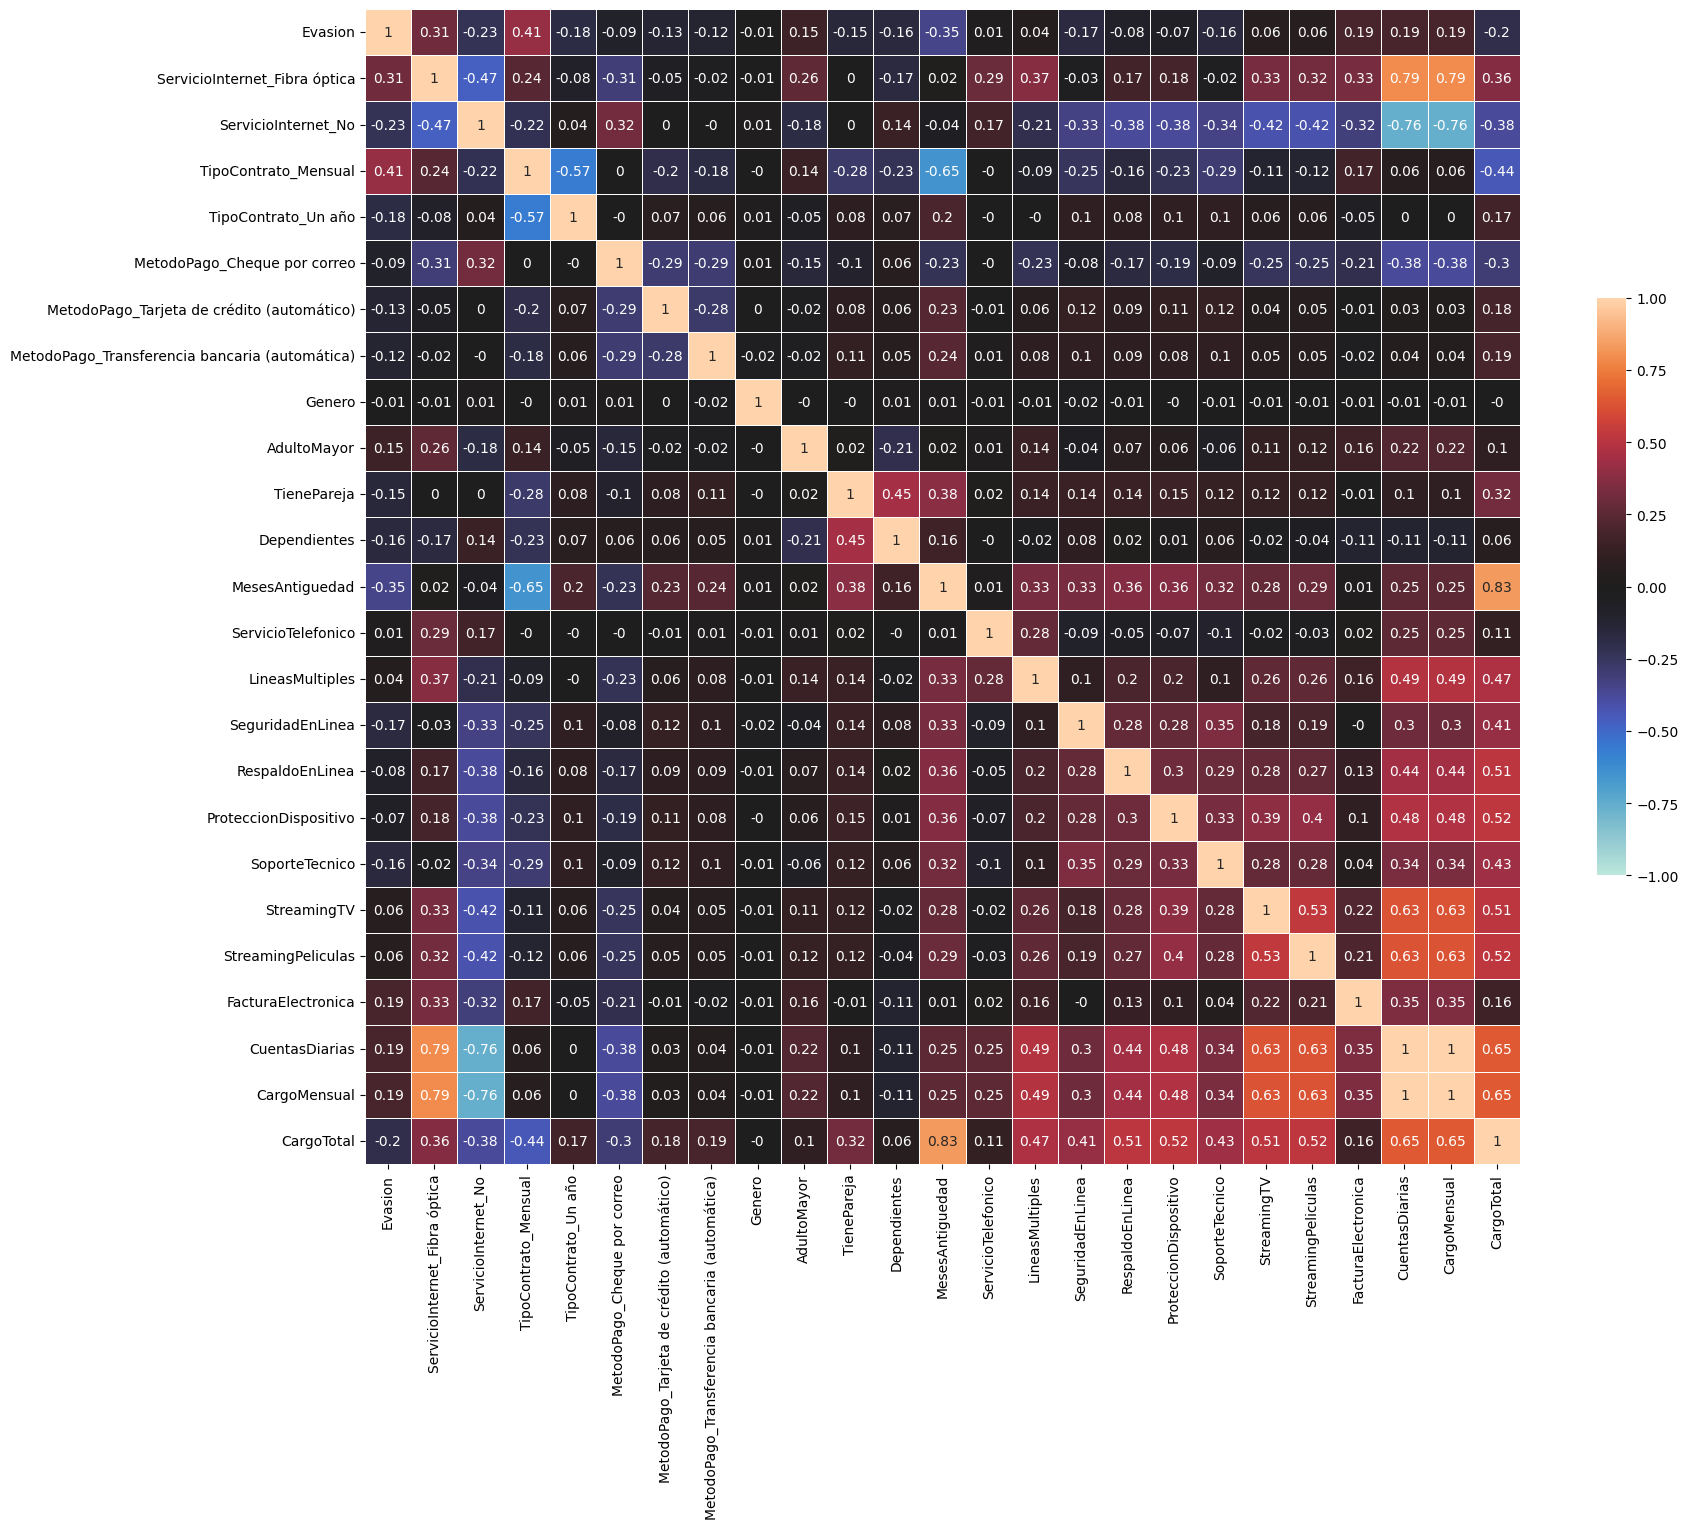

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
ax = sns.heatmap(np.round(correlacion, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

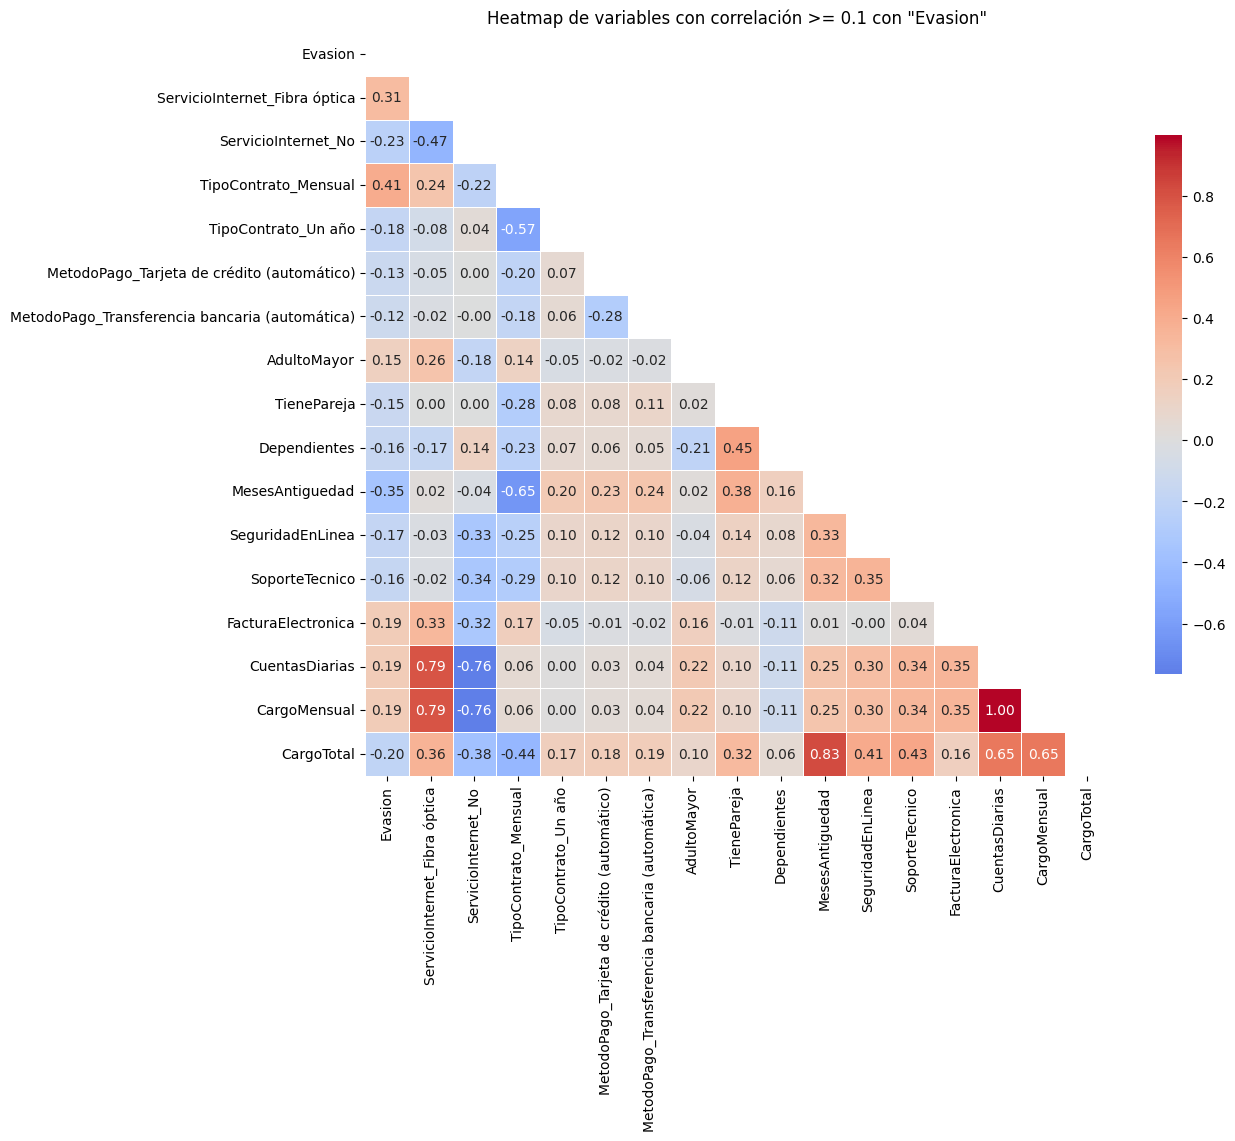

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Variable objetivo
variable_objetivo = 'Evasion'

# Definir el umbral mínimo de correlación absoluta para selección
limite = 0.1

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = correlacion.index[abs(correlacion[variable_objetivo]) >= limite].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if variable_objetivo not in variables_relevantes:
    variables_relevantes.append(variable_objetivo)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = correlacion.loc[variables_relevantes, variables_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limite} con "{variable_objetivo}"')
plt.show()

**Relacionando Variables con variable 'Evasion'**

In [23]:
print(correlacion[variable_objetivo].abs().sort_values(ascending=False))

Evasion                                           1.000000
TipoContrato_Mensual                              0.405103
MesesAntiguedad                                   0.352229
ServicioInternet_Fibra óptica                     0.308020
ServicioInternet_No                               0.227890
CargoTotal                                        0.198324
CuentasDiarias                                    0.193412
CargoMensual                                      0.193356
FacturaElectronica                                0.191825
TipoContrato_Un año                               0.177820
SeguridadEnLinea                                  0.171226
SoporteTecnico                                    0.164674
Dependientes                                      0.164221
AdultoMayor                                       0.150889
TienePareja                                       0.150448
MetodoPago_Tarjeta de crédito (automático)        0.134302
MetodoPago_Transferencia bancaria (automática)    0.1179

In [24]:
datos_codificados[['CargoMensual', 'CuentasDiarias']].corr()

,CargoMensual,CuentasDiarias
CargoMensual,1.000000,0.999996
CuentasDiarias,0.999996,1.000000


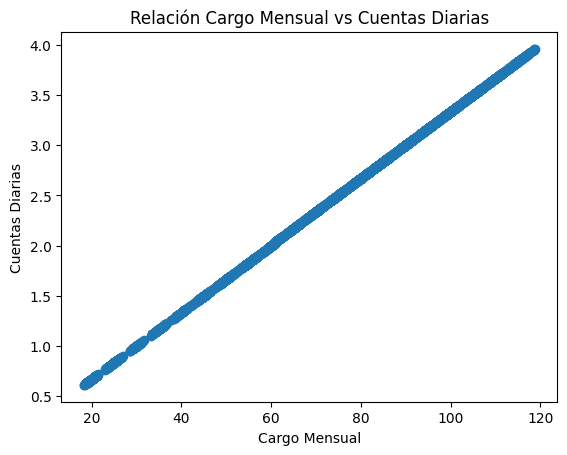

In [25]:
plt.scatter(datos_codificados['CargoMensual'],datos_codificados['CuentasDiarias']) #ejes x,y
plt.title('Relación Cargo Mensual vs Cuentas Diarias')
plt.xlabel('Cargo Mensual')
plt.ylabel('Cuentas Diarias')
plt.show()

In [26]:
datos_codificados[['CargoTotal', 'CuentasDiarias']].corr()

,CargoTotal,CuentasDiarias
CargoTotal,1.000000,0.651189
CuentasDiarias,0.651189,1.000000


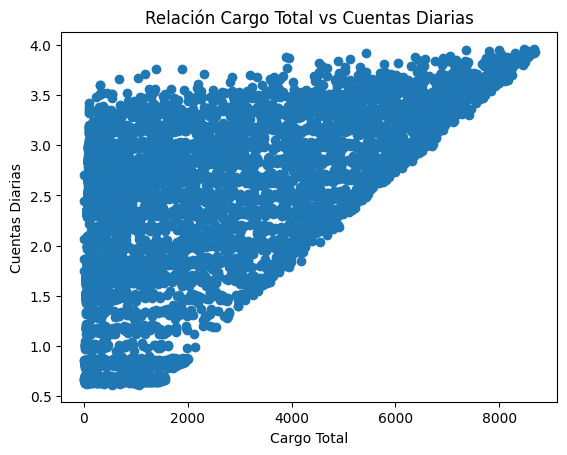

In [27]:
plt.scatter(datos_codificados['CargoTotal'],datos_codificados['CuentasDiarias']) #ejes x,y
plt.title('Relación Cargo Total vs Cuentas Diarias')
plt.xlabel('Cargo Total')
plt.ylabel('Cuentas Diarias')
plt.show()

In [28]:
datos_codificados[['MesesAntiguedad', 'CargoTotal']].corr()

,MesesAntiguedad,CargoTotal
MesesAntiguedad,1.000000,0.826178
CargoTotal,0.826178,1.000000


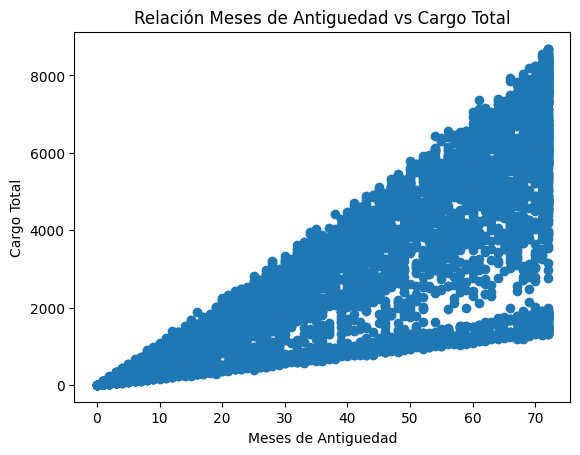

In [29]:
plt.scatter(datos_codificados['MesesAntiguedad'],datos_codificados['CargoTotal']) #ejes x,y
plt.title('Relación Meses de Antiguedad vs Cargo Total')
plt.xlabel('Meses de Antiguedad')
plt.ylabel('Cargo Total')
plt.show()

In [30]:
# Se omite la variable respuesta
predictores = datos_codificados.drop(columns='Evasion', errors='ignore')

# Matriz de correlación absoluta entre predictores
corr_pred = predictores.corr(numeric_only=True).abs()

# Quedarnos con el triángulo superior (sin diagonal)
upper = corr_pred.where(np.triu(np.ones_like(corr_pred, dtype=bool), k=1))

# Pares por encima del umbral
umbral_corr = 0.85
pareja_correlacion = (upper
    .stack()
    .reset_index()
    .rename(columns={'level_0':'col1','level_1':'col2', 0:'corr'})
    .query('corr >= @umbral_corr')
    .sort_values('corr', ascending=False)
)
pareja_correlacion

,col1,col2,corr
273,CuentasDiarias,CargoMensual,0.999996


### **Verificación de la proporción de Evasión**

Visualización gráfica de clientes que evaden (Sí) vs clientes que permanecen (No)

In [31]:
cantidad_evasion = datos_codificados.Evasion.value_counts()
proporcion_evasion = datos_codificados['Evasion'].value_counts(normalize=True).sort_index()

print(f'De un total de {datos_codificados["Evasion"].size} clientes.')
print(f'Los clientes que evaden son: {cantidad_evasion[1].sum()}, equivalentes al {proporcion_evasion[1]:.2%}')
print(f'Los clientes que permanecen son: {cantidad_evasion[0].sum()}, equivalentes al {proporcion_evasion[0]:.2%}')

De un total de 7043 clientes.
Los clientes que evaden son: 1869, equivalentes al 26.54%
Los clientes que permanecen son: 5174, equivalentes al 73.46%


In [32]:
px.histogram(datos, x='Evasion', text_auto=True, color='Evasion') #plotly.express

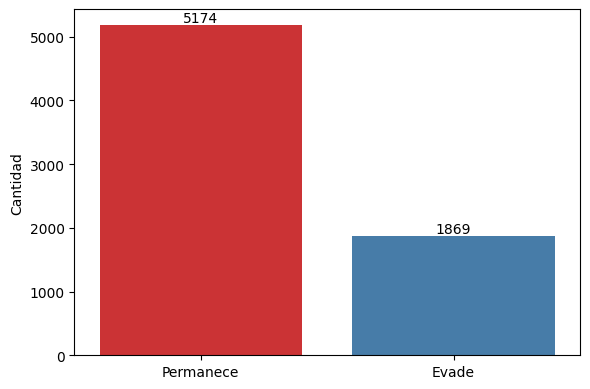

In [33]:
plt.figure(figsize=(6, 4))  # Opcional: ajustar el tamaño del gráfico

# Crear el gráfico
sns.countplot(data=datos, x='Evasion', hue='Evasion', palette='Set1', legend=False)

# Configurar etiquetas
plt.ylabel('Cantidad')
plt.xlabel('Evasión', visible=False)
plt.xticks([0, 1], ['Permanece', 'Evade'])

# Añadir los conteos sobre las barras
for p in plt.gca().patches:
    altura = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2, altura + 1,  # +1 para dejar espacio
             int(altura), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

---
>* **Se observa una diferencia significativa entre la cantidad de clientes que permanecen y aquellos que abandonan el servicio. Aunque la mayoría de los clientes se mantiene, el porcentaje de evasión alcanza un 26.54%, lo cual representa una proporción bastante considerable.**

---

### **Análisis Exploratorio de variables categóricas y numéricas**

### **Separación de Variables Explicativas y Respuesta**

In [34]:
from sklearn.model_selection import train_test_split

# Variables Explicativas
X = datos_codificados.drop('Evasion', axis=1)

# Variable Respuesta
y = datos_codificados['Evasion']

# División inicial entre conjunto general y conjunto de prueba (30% para prueba)
X, X_test,y,y_test = train_test_split(X,y,test_size= 0.2, stratify = y, random_state = 5)

# División secundaria: entrenamiento vs validación
X_train, X_val,y_train,y_val = train_test_split(X,y, stratify = y, random_state = 5)

In [35]:
X.head()

,ServicioInternet_Fibra óptica,ServicioInternet_No,TipoContrato_Mensual,TipoContrato_Un año,MetodoPago_Cheque por correo,MetodoPago_Tarjeta de crédito (automático),MetodoPago_Transferencia bancaria (automática),Genero,AdultoMayor,TienePareja,...,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturaElectronica,CuentasDiarias,CargoMensual,CargoTotal
2939,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,3.15,94.45,498.10
4419,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.83,85.00,85.00
6654,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,3.01,90.35,3419.30
2972,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,2.84,85.35,1463.45
5806,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.70,20.90,689.35


In [36]:
y.head()

,Evasion
2939,1
4419,1
6654,0
2972,1
5806,0


## **Entrenando Modelos**

En esta sección se entrenan y evalúan tres modelos de clasificación supervisada —**`Regresión Logística`**, **`Árbol de Decisión`** y **`Random Forest`**— con el objetivo de identificar cuál de ellos ofrece el mejor desempeño para **predecir si un cliente permanecerá o evadirá**. Cada modelo es evaluado mediante métricas clave como **`precisión`**, **`sensibilidad (recall)`**, **`exactitud`**, **`F1-score`**, **`AUC-ROC`**, y **`curvas de precisión vs recall`**, además de la visualización de sus respectivas **`matrices de confusión`**.

In [37]:
# Modelo Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier
# Crea una instancia del modelo de Random Forest
modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_arbol.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: {modelo_arbol.score(X_train,y_train)}')
print(f'La exactitud del Modelo de Árbol con el conjunto de validación es de: {modelo_arbol.score(X_val,y_val)}')

La exactitud del Modelo de Árbol con el conjunto de entrenamiento es de: 0.8899408284023669
La exactitud del Modelo de Árbol con el conjunto de validación es de: 0.7650816181689141


In [38]:
# Modelo Random Forest
from sklearn.ensemble import RandomForestClassifier
# Crea una instancia del modelo de Random Forest
modelo_forest = RandomForestClassifier(max_depth=10, random_state=5) # Límite de profundidad = 10
# Entrena el modelo
modelo_forest.fit(X_train,y_train)                   # Vuelve a entrenar
print(f'La exactitud del Modelo Forest con el conjunto de entrenamiento es de: {modelo_forest.score(X_train,y_train)}')
print(f'La exactitud del Modelo Forest con el conjunto de validación es de: {modelo_forest.score(X_val,y_val)}')

La exactitud del Modelo Forest con el conjunto de entrenamiento es de: 0.8953846153846153
La exactitud del Modelo Forest con el conjunto de validación es de: 0.8034066713981547


In [39]:
# Modelo Regresión Logística
from sklearn.linear_model import LogisticRegression
# Crea una instancia del modelo de regresión logística
modelo_logistica = LogisticRegression(max_iter=2000, solver='liblinear')
# Entrena el modelo
modelo_logistica.fit(X_train, y_train)
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: {modelo_logistica.score(X_train,y_train)}')
print(f'La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: {modelo_logistica.score(X_val,y_val)}')

La exactitud del Modelo de Regresión Logística con el conjunto de entrenamiento es de: 0.8009467455621302
La exactitud del Modelo de Regresión Logística con el conjunto de validación es de: 0.8019872249822569


**Entrenamiento y evaluación de modelos**

* Se **entrenaron tres modelos de clasificación** utilizando `X_train, y_train` y se evaluaron en `X_val, y_val`. La métrica utilizada fue accuracy (`.score()` de scikit-learn).

* La partición utilizada es la previamente definida (estratificada y con `random_state=5`).

**Modelos y configuración**

* **Árbol de Decisión** (`DecisionTreeClassifier`) con `max_depth=10`.
* **Random Forest** (`RandomForestClassifier`) con `max_depth=10`.
* **Regresión Logística** (`LogisticRegression`) con `solver='liblinear'` y `max_iter=2000`.

**Resultados (accuracy)**

* **Árbol de Decisión**
> * Entrenamiento: **0.890**  
> * Validación: **0.759**

* **Random Forest**
> * Entrenamiento: **0.895**  
> * Validación: **0.807**

* **Regresión Logística**
> * Entrenamiento: **0.801**  
> * Validación: **0.802**

**Observaciones**

* El **Árbol de Decisión** muestra una **brecha train–val ≈ 0.131**, indicando **sobreajuste**.
* El **Random Forest** presenta una **brecha menor (≈ 0.088)** y el **mejor accuracy en validación (0.807)**, por lo que **generaliza mejor** que el árbol simple.
* La **Regresión Logística** tiene la **brecha más baja (≈ 0.001)** —prácticamente sin sobreajuste— y un desempeño de validación **muy cerca de Random Forest (0.802 vs 0.807)**.
* Los tres modelos superan el baseline de predecir siempre la **clase mayoritaria (~0.735)**.

**Conclusión**

* **Random Forest** es el mejor punto de partida por **mayor accuracy en validación** y **menor sobreajuste** que el árbol.  
* **Regresión Logística** es una **alternativa fuerte y más interpretable**, con rendimiento cercano y excelente estabilidad entre entrenamiento y validación.  
* Hay margen de mejora con ajuste de hiperparámetros y con métricas más alineadas al objetivo de negocio (p. ej., maximizar recall para “Evade”).




### **Matriz de Confusión**

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
# Genera las predicciones del modelo de Árbol de Decisión usando los datos del conjunto de validación.
y_previsto_arbol = modelo_arbol.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Árbol
matriz_confusion_arbol = confusion_matrix(y_val,y_previsto_arbol)
print(matriz_confusion_arbol)

[[892 143]
 [188 186]]


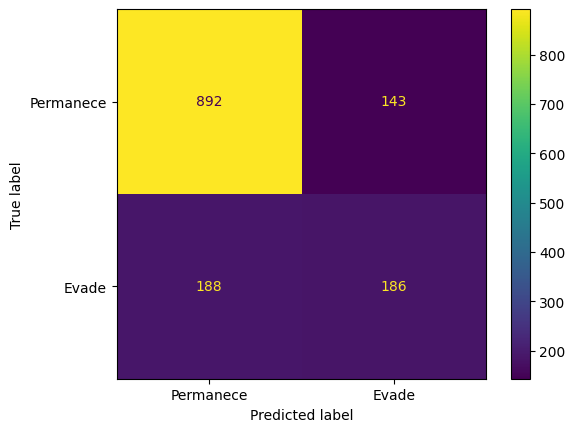

In [42]:
# Matriz de Confusión - Modelo Árbol
visualizacion_arbol = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_arbol,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_arbol.plot();

In [43]:
# Genera las predicciones del modelo de Random Forest usando los datos del conjunto de validación.
y_previsto_forest = modelo_forest.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Random Forest
matriz_confusion_forest = confusion_matrix(y_val,y_previsto_forest)
print(matriz_confusion_forest)

[[944  91]
 [186 188]]


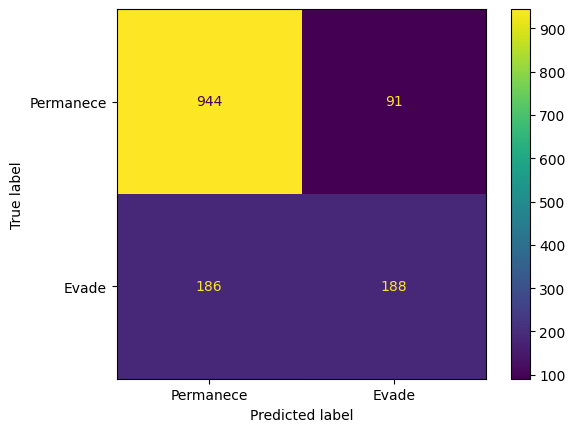

In [44]:
# Matriz de Confusión - Modelo Random Forest
visualizacion_forest = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_forest,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_forest.plot();

In [45]:
# Genera las predicciones del modelo de Regresión Logística usando los datos del conjunto de validación.
y_previsto_logistica = modelo_logistica.predict(X_val)
# Matriz de Confusión tipo Array - Modelo Regresión Logística
matriz_confusion_logistica = confusion_matrix(y_val, y_previsto_logistica)
print(matriz_confusion_logistica)

[[941  94]
 [185 189]]


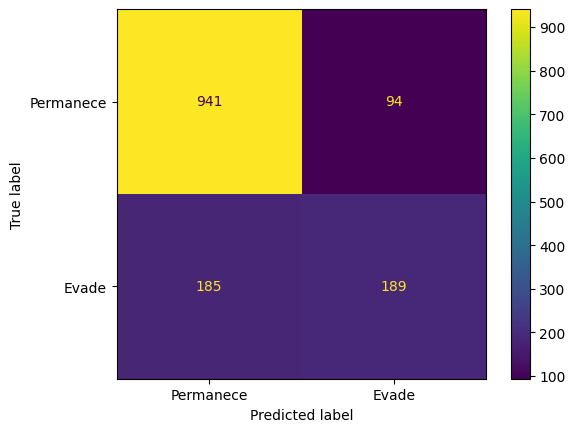

In [46]:
# Matriz de Confusión - Modelo Regresión Logística
visualizacion_logistica = ConfusionMatrixDisplay(
    confusion_matrix=matriz_confusion_logistica,
    display_labels=['Permanece', 'Evade']  # Etiquetas para las clases 0 y 1
)
visualizacion_logistica.plot();

**Matriz de confusión y métricas de evaluación**

* Con los modelos ya entrenados sobre `X_train, y_train`, se obtuvieron **predicciones en `X_val`** y se calcularon la **matriz de confusión** y métricas para la clase positiva **“Evade” (1)**.
* El formato de la matriz impresa es `[[TN FP], [FN TP]]`.

**Árbol de Decisión (max_depth = 10)**

> * Matriz: `[[886 149], [190 184]]`  
> * Accuracy: **0.759**  
> * Precisión (Evade): **0.553**  
> * Recall / Sensibilidad (Evade): **0.492**  
> * F1 (Evade): **0.521**

**Random Forest (max_depth = 10)**

> * Matriz: `[[949  86], [186 188]]`  
> * Accuracy: **0.807**  
> * Precisión (Evade): **0.686**  
> * Recall / Sensibilidad (Evade): **0.503**  
> * F1 (Evade): **0.580**

**Regresión Logística**

> * Matriz: `[[941  94], [185 189]]`  
> * Accuracy: **0.802**  
> * Precisión (Evade): **0.668**  
> * Recall / Sensibilidad (Evade): **0.505**  
> * F1 (Evade): **0.575**

**Lecturas rápidas**

* **Random Forest** logra la **mayor accuracy (0.807)** y el **mejor F1 (0.580)**, con la **precisión más alta** para “Evade”.  
* **Regresión Logística** queda muy cerca en accuracy (**0.802**) y F1 (**0.575**), con **recall similar** al de Random Forest.  
* **Árbol de Decisión** presenta la **menor precisión y F1** en esta comparación.  
* Los **tres modelos superan el baseline** de clasificar siempre la clase mayoritaria (**~0.735**).

**Conclusión**

* Para un balance entre **precisión y recall** manteniendo **mejor desempeño global**, **Random Forest** es la opción inicial recomendada.  
* Si se busca un modelo **lineal, interpretable** y con desempeño cercano, **Regresión Logística** es una buena alternativa.  
* El **Árbol de Decisión** puede servir como línea base explicativa, pero rinde peor en estas métricas.


### **Métricas de Evaluación**

#### **Precisión, recall, accuracy y F1-Score**

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [48]:
# Métricas Modelo Árbol
print(f'La precisión del modelo de árbol es: {precision_score(y_val,y_previsto_arbol)}')
print(f'La sensibilidad (recall) del modelo de árbol es: {recall_score(y_val,y_previsto_arbol)}')
print(f'La exactitud (accuracy) del modelo de árbol es: {accuracy_score(y_val,y_previsto_arbol)}')
print(f'El F1-Score del modelo de árbol es: {f1_score(y_val,y_previsto_arbol)}')

La precisión del modelo de árbol es: 0.5653495440729484
La sensibilidad (recall) del modelo de árbol es: 0.49732620320855614
La exactitud (accuracy) del modelo de árbol es: 0.7650816181689141
El F1-Score del modelo de árbol es: 0.5291607396870555


In [49]:
# Métricas Modelo Forest
print(f'La precisión del modelo forest es: {precision_score(y_val,y_previsto_forest)}')
print(f'La sensibilidad (recall) del modelo forest es: {recall_score(y_val,y_previsto_forest)}')
print(f'La exactitud (accuracy) del modelo forest es: {accuracy_score(y_val,y_previsto_forest)}')
print(f'El F1-Score del modelo forest es: {f1_score(y_val,y_previsto_forest)}')

La precisión del modelo forest es: 0.6738351254480287
La sensibilidad (recall) del modelo forest es: 0.5026737967914439
La exactitud (accuracy) del modelo forest es: 0.8034066713981547
El F1-Score del modelo forest es: 0.5758039816232772


In [50]:
# Métricas Modelo Regresión Logística
print(f'La precisión del modelo de Regresión Logística es: {precision_score(y_val,y_previsto_logistica)}')
print(f'La sensibilidad (recall) del modelo de Regresión Logística es: {recall_score(y_val,y_previsto_logistica)}')
print(f'La exactitud (accuracy) del modelo de Regresión Logística es: {accuracy_score(y_val,y_previsto_logistica)}')
print(f'El F1-Score del modelo de Regresión Logística es: {f1_score(y_val,y_previsto_logistica)}')

La precisión del modelo de Regresión Logística es: 0.6678445229681979
La sensibilidad (recall) del modelo de Regresión Logística es: 0.5053475935828877
La exactitud (accuracy) del modelo de Regresión Logística es: 0.8019872249822569
El F1-Score del modelo de Regresión Logística es: 0.5753424657534246


**Precisión, recall, accuracy y F1-Score (validación)**

* Las métricas se calcularon sobre `X_val, y_val`. Clase positiva: **“Evade” (1)**.

**Árbol de Decisión (max_depth = 10)**  
> * Precisión: **0.553**  
> * Recall: **0.492**  
> * Accuracy: **0.759**  
> * F1-Score: **0.521**

**Random Forest (max_depth = 10)**  
> * Precisión: **0.686**  
> * Recall: **0.503**  
> * Accuracy: **0.807**  
> * F1-Score: **0.580**

**Regresión Logística**  
> * Precisión: **0.668**  
> * Recall: **0.505**  
> * Accuracy: **0.802**  
> * F1-Score: **0.575**

**Lecturas rápidas**
* **Random Forest** obtiene el **mejor F1 (0.580)** y la **mayor precisión** para “Evade”, junto con la **mejor accuracy**.  
* **Regresión Logística** queda **muy cerca** en F1 (**0.575**) y accuracy (**0.802**).  
* **Árbol de Decisión** es el que **menos rinde** en estas métricas.


#### **Curva ROC y Métrica AUC**

In [51]:
# Importamos la herramienta para graficar la curva ROC
from sklearn.metrics import RocCurveDisplay
# Importamos la función para calcular el área bajo la curva ROC (AUC)
from sklearn.metrics import roc_auc_score

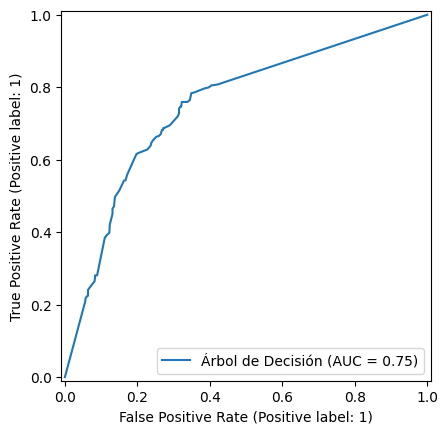

In [52]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_arbol  = modelo_arbol.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Árbol
RocCurveDisplay.from_predictions(y_val, y_score_arbol,  name='Árbol de Decisión');

In [53]:
# El Área Bajo la Curva (AUC) - Modelo Árbol
print(f'El área bajo la curva ROC del modelo de Árbol de Decisión es de:  {roc_auc_score(y_val, y_score_arbol):.4f}')

El área bajo la curva ROC del modelo de Árbol de Decisión es de:  0.7503


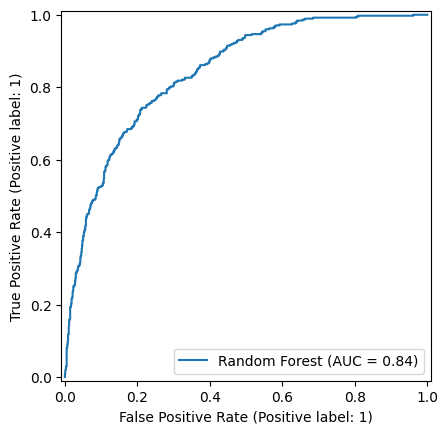

In [54]:
# Puntajes: probabilidad de la clase positiva (Evade = 1)
y_score_forest = modelo_forest.predict_proba(X_val)[:, 1]

# Curva ROC Modelo Forest
RocCurveDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [55]:
# El Área Bajo la Curva (AUC) - Modelo Forest
print(f'El área bajo la curva ROC del modelo Random Forest es de: {roc_auc_score(y_val, y_score_forest):.4f}')

El área bajo la curva ROC del modelo Random Forest es de: 0.8428


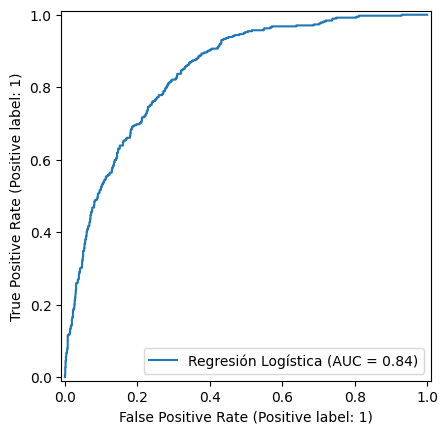

In [56]:
# Calcular las probabilidades de predicción en el conjunto de prueba
y_proba_logistica = modelo_logistica.predict_proba(X_val)[:, 1]
# Curva ROC Modelo Regresión Logística
RocCurveDisplay.from_predictions(y_val, y_proba_logistica,  name='Regresión Logística');

In [57]:
# El Área Bajo la Curva (AUC) - Modelo Regresión Logística
print(f'El área bajo la curva ROC del modelo de Regresión Logística es de: {roc_auc_score(y_val, y_proba_logistica):.4f}')

El área bajo la curva ROC del modelo de Regresión Logística es de: 0.8413


**Curva ROC y Métrica AUC**

* Se obtuvieron **probabilidades de la clase positiva (Evade = 1)** con `predict_proba[:, 1]` para cada modelo.
* Con esos puntajes se graficó la **curva ROC** y se calculó el **AUC** sobre `y_val` (métrica independiente del umbral).

**Árbol de Decisión (max_depth = 10)**  
> * AUC (ROC): **0.747**

**Random Forest (max_depth = 10)**  
> * AUC (ROC): **0.843**

**Regresión Logística (solver = liblinear, max_iter = 2000)**  
> * AUC (ROC): **0.841**

**Lecturas rápidas**

* Los tres modelos superan el azar (`AUC > 0.5`).  
* **Random Forest** logra el **mejor AUC (≈ 0.843)**; la **Regresión Logística** queda **muy cerca (≈ 0.841)**.  
* El **Árbol de Decisión** queda por detrás (**≈ 0.747**), coherente con sus resultados de accuracy/F1.

**Conclusión**

* Para **priorizar clientes por riesgo** usando un *score*, **Random Forest** o **Regresión Logística** son las mejores opciones (AUC altos y estables).  



#### **Curva de Precisión x Recall y Métrica AP (Average Precision)**

In [58]:
# Importamos la clase que permite graficar la curva Precisión vs Recall
from sklearn.metrics import PrecisionRecallDisplay

# Importamos la métrica de promedio de precisión (average precision)
from sklearn.metrics import average_precision_score

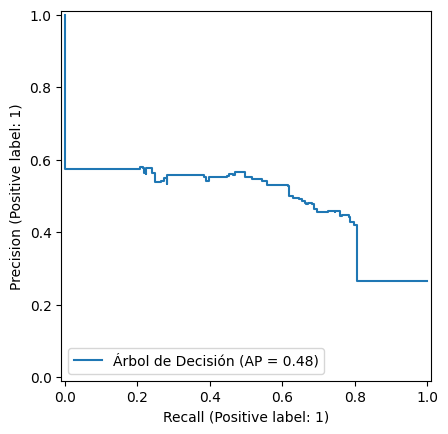

In [59]:
# Curva de Precisión x Recall - Modelo Árbol de Decisión
PrecisionRecallDisplay.from_predictions(y_val, y_score_arbol, name='Árbol de Decisión');

In [60]:
# Métrica AP - Modelo Árbol de Decisión
print(f'El score promedio de precisión vs recall para el modelo de árbol es de: {average_precision_score(y_val, y_score_arbol)}')

El score promedio de precisión vs recall para el modelo de árbol es de: 0.4844644974956257


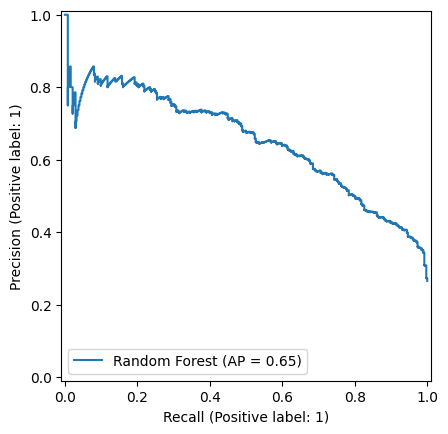

In [61]:
# Curva de Precisión x Recall - Modelo Random Forest
PrecisionRecallDisplay.from_predictions(y_val, y_score_forest, name='Random Forest');

In [62]:
# Métrica AP - Modelo Random Forest
print(f'El score promedio de precisión vs recall para el modelo forest es de: {average_precision_score(y_val, y_score_forest)}')

El score promedio de precisión vs recall para el modelo forest es de: 0.6515991169676743


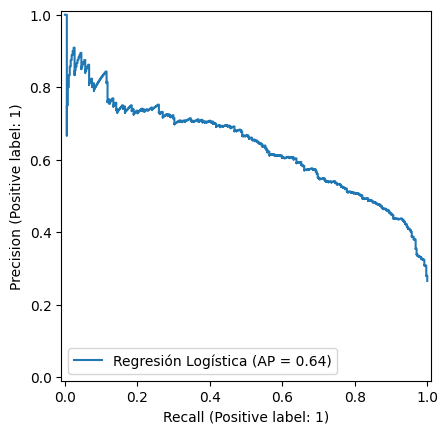

In [63]:
# Curva de Precisión x Recall - Modelo Regresión Logística
PrecisionRecallDisplay.from_predictions(y_val, y_proba_logistica, name='Regresión Logística');

In [64]:
# Métrica AP - Modelo Regresión Logística
print(f'El score promedio de precisión vs recall para el modelo de Regresión Logística es de: {average_precision_score(y_val, y_proba_logistica)}')

El score promedio de precisión vs recall para el modelo de Regresión Logística es de: 0.6371819971566661


**Curvas Precisión–Recall y Métrica AP (Average Precision)**

* Se calcularon las curvas **Precisión–Recall** y la métrica **AP** usando las probabilidades de pertenecer a la clase positiva **“Evade (1)”** sobre `X_val`.
* El **AP** es el área bajo la curva Precisión–Recall; en problemas desbalanceados es más informativo que la accuracy.  
  El baseline del AP es la prevalencia de la clase positiva en validación (**≈ 0.266**).

**Resultados (validación)**

* **Árbol de Decisión (max_depth = 10)**  
  > AP: **0.478**

* **Random Forest (max_depth = 10)**  
  > AP: **0.654**

* **Regresión Logística**  
  > AP: **0.637**

**Lecturas rápidas**

* Los **tres modelos** superan el baseline de prevalencia (**~0.266**), por lo que aportan valor para encontrar evasores.
* **Random Forest** obtiene el **mayor AP**, manteniendo el mejor compromiso precisión–recall a lo largo de los umbrales.
* **Regresión Logística** queda **muy cerca** del bosque en AP y también muestra buen desempeño bajo desbalance.
* El **Árbol de Decisión** es el que menos área logra, coherente con sus métricas de precisión/recall más modestas.


#### **Informe de Métricas**

In [65]:
# Informe de Métricas
from sklearn.metrics import classification_report

In [66]:
# Informe de Métricas para Modelo Árbol de Decisión
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Árbol:\n_______________________________________________________\n{classification_report(y_val, y_previsto_arbol)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo Random Forest
print('*******************************************************')
print(f'Informe de Métricas para Modelo Forest:\n_______________________________________________________\n{classification_report(y_val, y_previsto_forest)}')
print('*******************************************************\n\n')

# Informe de Métricas para Modelo de Regresión Logística
print('*******************************************************')
print(f'Informe de Métricas para Modelo de Regresión Logística:\n_______________________________________________________\n{classification_report(y_val, y_previsto_logistica)}')
print('*******************************************************')

*******************************************************
Informe de Métricas para Modelo de Árbol:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1035
           1       0.57      0.50      0.53       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409

*******************************************************


*******************************************************
Informe de Métricas para Modelo Forest:
_______________________________________________________
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.50      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80    

**Informe de métricas (classification_report)**

* Se generó el **informe de métricas** en el conjunto de validación (`X_val`, `y_val`) para los **tres modelos** ya entrenados.
* Las métricas mostradas por clase son: **precision**, **recall** y **f1-score**; además se reporta el **accuracy** global.

**Árbol de Decisión (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.82**, **recall 0.86**, **f1 0.84**, support **1035**  
> * Clase 1 (Evade): **precision 0.55**, **recall 0.49**, **f1 0.52**, support **374**  
> * **Accuracy global:** **0.76**  
> * **Macro avg** — precision **0.69**, recall **0.67**, f1 **0.68**, support **1409**  
> * **Weighted avg** — precision **0.75**, recall **0.76**, f1 **0.75**, support **1409**

**Random Forest (max_depth = 10)**

> * Clase 0 (Permanece): **precision 0.84**, **recall 0.92**, **f1 0.87**, support **1035**  
> * Clase 1 (Evade): **precision 0.69**, **recall 0.50**, **f1 0.58**, support **374**  
> * **Accuracy global:** **0.81**  
> * **Macro avg** — precision **0.76**, recall **0.71**, f1 **0.73**, support **1409**  
> * **Weighted avg** — precision **0.80**, recall **0.81**, f1 **0.80**, support **1409**

**Regresión Logística**

> * Clase 0 (Permanece): **precision 0.84**, **recall 0.91**, **f1 0.87**, support **1035**  
> * Clase 1 (Evade): **precision 0.67**, **recall 0.51**, **f1 0.58**, support **374**  
> * **Accuracy global:** **0.80**  
> * **Macro avg** — precision **0.75**, recall **0.71**, f1 **0.72**, support **1409**  
> * **Weighted avg** — precision **0.79**, recall **0.80**, f1 **0.79**, support **1409**

**Lecturas rápidas**

* **Random Forest** presenta la **mayor exactitud global (0.81)** y, junto con **Regresión Logística (0.80)**, mantiene **buena precisión** en *Evade*.  
* **Árbol de Decisión** consigue **menos desempeño global** y **menor precisión** en *Evade*, aunque es competitivo en *f1* para la clase mayoritaria.  
* Entre **Random Forest** y **Regresión Logística** las métricas son cercanas; el bosque rinde **ligeramente mejor** en recall/f1 ponderado.

**Conclusión**

* Para un punto de partida, **Random Forest** se recomienda por su **mejor desempeño global**.  
* **Regresión Logística** es una alternativa interpretable con resultados muy similares.  
* Si el objetivo es **capturar más evasores**, puede ajustarse el **umbral de decisión** (en cualquiera de los dos modelos probabilísticos) para aumentar el *recall* en *Evade*, asumiendo más falsos positivos.


### **Interpretabilidad preliminar (validación): importancia y what-if**

In [110]:
import numpy as np
import pandas as pd

def tabla_importancias(modelo, X_eval, y_eval=None, top=15, n_repeats=10, seed=5):

    # Devuelve un DataFrame con las 'importancias' de las features para el modelo dado.
    # - Si es árbol/forest -> usa feature_importances_.
    # - Si es lineal (p.ej. Regresión Logística) -> usa |coeficiente| y además muestra el signo.
    # - Si no aplica lo anterior -> usa permutation_importance (requiere y_eval).

    # nombres de columnas (tras tu one-hot) — X_eval debe ser DataFrame
    feat = np.array(getattr(X_eval, "columns", [f"f{i}" for i in range(X_eval.shape[1])]))

    # 1) árboles
    if hasattr(modelo, "feature_importances_"):
        imp = np.asarray(modelo.feature_importances_, dtype=float)
        df = (pd.DataFrame({"feature": feat, "importance": imp})
                .sort_values("importance", ascending=False)
                .head(top))
        df.index = range(1, len(df)+1)
        return df

    # 2) modelos lineales (LogReg)
    if hasattr(modelo, "coef_"):
        coef = modelo.coef_.ravel().astype(float)
        df = (pd.DataFrame({
                "feature": feat,
                "coef": coef,
                "abs_importance": np.abs(coef)
            })
            .sort_values("abs_importance", ascending=False)
            .drop(columns="abs_importance")
            .head(top))
        df.index = range(1, len(df)+1)
        return df

    # 3) fallback: permutation importance
    if y_eval is None:
        raise ValueError("Para permutation_importance necesitas y_eval.")
    from sklearn.inspection import permutation_importance
    res = permutation_importance(modelo, X_eval, y_eval,
                                 n_repeats=n_repeats, random_state=seed, n_jobs=-1)
    imp = res.importances_mean
    df = (pd.DataFrame({"feature": feat, "importance": imp})
            .sort_values("importance", ascending=False)
            .head(top))
    df.index = range(1, len(df)+1)
    return df

In [128]:
modelos = [
    ("Árbol de Decisión",   modelo_arbol),
    ("Random Forest",       modelo_forest),
    ("Regresión Logística", modelo_logistica),
]

for nombre, mdl in modelos:
    print(f"\n\n*****************************************\n************** {nombre} ")
    display(tabla_importancias(mdl, X_val, y_val, top=12))



*****************************************
************** Árbol de Decisión 


,feature,importance
1,TipoContrato_Mensual,0.285846
2,CargoTotal,0.201519
3,CargoMensual,0.125922
4,MesesAntiguedad,0.083224
5,ServicioInternet_Fibra óptica,0.078858
6,CuentasDiarias,0.034629
7,FacturaElectronica,0.021986
8,Dependientes,0.015282
9,LineasMultiples,0.014233
10,AdultoMayor,0.014018




*****************************************
************** Random Forest 


,feature,importance
1,CargoTotal,0.156645
2,MesesAntiguedad,0.153304
3,TipoContrato_Mensual,0.127294
4,CargoMensual,0.120417
5,CuentasDiarias,0.102195
6,ServicioInternet_Fibra óptica,0.062280
7,SoporteTecnico,0.025247
8,SeguridadEnLinea,0.024405
9,ServicioInternet_No,0.021964
10,FacturaElectronica,0.021864




*****************************************
************** Regresión Logística 


,feature,coef
1,ServicioTelefonico,-0.963324
2,TipoContrato_Mensual,0.955280
3,ServicioInternet_No,-0.703761
4,ServicioInternet_Fibra óptica,0.607486
5,MetodoPago_Tarjeta de crédito (automático),-0.561137
6,SoporteTecnico,-0.472993
7,SeguridadEnLinea,-0.364668
8,LineasMultiples,0.301307
9,MetodoPago_Cheque por correo,-0.271939
10,FacturaElectronica,0.267543


**Importancia de variables (validación) e interpretación**

* Para **árboles** (Árbol y Random Forest) se usó `feature_importances_` (capacidad de separación, no indica signo).
* Para **Regresión Logística** se usaron **coeficientes** (magnitud = fuerza; **signo**: `+` aumenta prob. de *Evade*, `−` la reduce).

**Random Forest (top variables)**

> * `CargoTotal`: **0.157**  
> * `MesesAntiguedad`: **0.153**  
> * `TipoContrato_Mensual`: **0.127**  
> * `CargoMensual`: **0.120**  
> * `CuentasDiarias`: **0.102**  
> * `ServicioInternet_Fibra óptica`: **0.062**  
> * `SoporteTecnico`: **0.025** · `SeguridadEnLinea`: **0.024** · `ServicioInternet_No`: **0.022** · `FacturaElectronica`: **0.022** · `Dependientes`: **0.018** · `AdultoMayor`: **0.016**

**Árbol de Decisión (top variables)**

> * `TipoContrato_Mensual`: **0.286**  
> * `CargoTotal`: **0.202**  
> * `CargoMensual`: **0.126**  
> * `MesesAntiguedad`: **0.083**  
> * `ServicioInternet_Fibra óptica`: **0.079**  
> * `CuentasDiarias`: **0.035** · `FacturaElectronica`: **0.022** · `Dependientes`: **0.015** · `LineasMultiples`: **0.014** · `AdultoMayor`: **0.014** · `RespaldoEnLinea`: **0.012** · `ServicioInternet_No`: **0.012**

**Regresión Logística (coeficientes; signo = dirección del efecto)**

> **(+ Aumentan riesgo):**  
> `TipoContrato_Mensual` **+0.955**, `ServicioInternet_Fibra óptica` **+0.607**, `LineasMultiples` **+0.301**, `FacturaElectronica` **+0.268**, `TipoContrato_Un año` **+0.256**  
> **(− Reducen riesgo):**  
> `ServicioTelefonico` **−0.963**, `ServicioInternet_No` **−0.704**, `MetodoPago_Tarjeta de crédito (automático)` **−0.561**, `SoporteTecnico` **−0.473**, `SeguridadEnLinea` **−0.365**, `Dependientes` **−0.259**

**Lecturas rápidas**

* Hay **consistencia** entre modelos: el **tipo de contrato** (especialmente **mensual**) y los **cargos/uso** (`CargoMensual`, `CargoTotal`, `CuentasDiarias`) son **drivers clave** del riesgo de evasión.  
* Señales de **vinculación/servicio** (`ServicioTelefonico`, **pago automático**, `SoporteTecnico`, `SeguridadEnLinea`) aparecen **protectoras** en la Logística (coeficientes negativos).  
* `CargoMensual` y `CuentasDiarias` están **muy correlacionadas**; en árboles la importancia puede **repartirse** entre ambas (no duplicar conclusiones).

**Conclusión**

* **Perfil de mayor riesgo:** clientes con **contrato mensual**, **alto gasto/uso** y **internet fibra**.  
* **Palancas de retención:** incentivar **planes de mayor plazo**, promover **pago automático**, y reforzar **soporte** + **seguridad** (bundles).


## **Validación Cruzada**

### **Intervalo de confianza con validación cruzada + KFold**

In [67]:
from sklearn.model_selection import KFold, cross_validate

In [68]:
kf = KFold(n_splits=10, shuffle=True, random_state = 5)

In [69]:
# Métricas Modelo Árbol de Decisión
cv_arbol = cross_validate(modelo_arbol, X, y, cv=kf)

# Métricas Modelo Random Forest
cv_forest = cross_validate(modelo_forest, X, y, cv=kf)

# Métricas Modelo Regresión Logística
cv_logistica = cross_validate(modelo_logistica, X, y, cv=kf)

In [70]:
# Validación Cruzada con Múltiples Métricas en Modelo de Árbol de Decisión
cv_arbol

{'fit_time': array([0.11190557, 0.06628036, 0.04307556, 0.0491488 , 0.0422008 ,
        0.05196381, 0.0789094 , 0.0457828 , 0.04355979, 0.08140111]),
 'score_time': array([0.00840378, 0.0051775 , 0.00364089, 0.00396132, 0.00369692,
        0.00369334, 0.0059247 , 0.00354028, 0.0042038 , 0.0043416 ]),
 'test_score': array([0.78368794, 0.77659574, 0.74822695, 0.7570922 , 0.75666075,
        0.74777975, 0.77442274, 0.74955595, 0.73357016, 0.75310835])}

In [71]:
# Validación Cruzada con Múltiples Métricas en Modelo de Random Forest
cv_forest

{'fit_time': array([1.65701461, 1.14107871, 1.03453398, 0.96661019, 0.91472793,
        1.08461332, 0.92359948, 0.85207772, 0.84602022, 0.84335852]),
 'score_time': array([0.02593708, 0.05571604, 0.07333374, 0.02982569, 0.0296917 ,
        0.03014517, 0.01641989, 0.02360439, 0.02226973, 0.02257872]),
 'test_score': array([0.81028369, 0.81028369, 0.80851064, 0.80673759, 0.78863233,
        0.80284192, 0.79218472, 0.80817052, 0.78152753, 0.81349911])}

In [72]:
# Validación Cruzada con Múltiples Métricas en Modelo de Regresión Logística
cv_logistica

{'fit_time': array([0.05339241, 0.05370927, 0.04685569, 0.04079413, 0.04194641,
        0.04732037, 0.04430246, 0.04477143, 0.04647946, 0.04691982]),
 'score_time': array([0.00461888, 0.00320458, 0.00398898, 0.00299191, 0.00355339,
        0.00304818, 0.00336576, 0.0034709 , 0.00371695, 0.00358653]),
 'test_score': array([0.82092199, 0.79609929, 0.79609929, 0.80319149, 0.78685613,
        0.79751332, 0.79396092, 0.80461812, 0.79218472, 0.81882771])}

In [73]:
# Calcula el intervalo de confianza a partir de un diccionario de resultados.
# Usa el promedio y desviación estándar de los valores de test_score.
def intervalo_confianza_test_score(nombre_modelo, resultado):
  promedio = resultado['test_score'].mean()
  desvio_std = resultado['test_score'].std()
  print(f'El intervalo de confianza del Modelo {nombre_modelo} es de: {promedio-2*desvio_std},{min(promedio+2*desvio_std , 1)}')

In [74]:
# Intervalos de confianza para Modelos de Árbol y Random Forest
intervalo_confianza_test_score('Árbol de Decisión',cv_arbol)
intervalo_confianza_test_score('Random Forest',cv_forest)
intervalo_confianza_test_score('Regresión Logística',cv_logistica)

El intervalo de confianza del Modelo Árbol de Decisión es de: 0.7286084824115254,0.7875316231526382
El intervalo de confianza del Modelo Random Forest es de: 0.7816126019429429,0.8229217442016977
El intervalo de confianza del Modelo Regresión Logística es de: 0.7798603777625256,0.8221942183096814


**Validación cruzada (KFold=10, shuffle=True, random_state=5)**

* Se aplicó **validación cruzada** con `KFold` de 10 particiones sobre todo `X, y`.
* La métrica usada fue **accuracy** (método `.score()` por defecto de los clasificadores).
* Se reporta un **rango fold-a-fold** calculado como **media ± 2·desv.estándar** de los `test_score` de cada fold.

**Resultados (accuracy, media ± 2·sd)**

* **Árbol de Decisión**: **0.722 – 0.792**
* **Random Forest**: **0.782 – 0.817**
* **Regresión Logística**: **0.780 – 0.822**

**Lecturas rápidas**

* **Random Forest** y **Regresión Logística** muestran desempeños **similares** y **superiores** al Árbol.
* Los **intervalos de RF y Logística se solapan**, pero ambos quedan por encima del intervalo del Árbol, lo que confirma la brecha observada en el hold-out.
* La magnitud de los rangos es razonable para 10 folds; el **promedio central** ronda **~0.80** para RF/Logística y **~0.76** para Árbol.

**Conclusión**

* En términos de **accuracy promedio**, los **candidatos** son **Random Forest** y **Regresión Logística**; el **Árbol** queda por detrás.
* La elección final debería considerar también las **métricas de ranking** que ya calculaste (**AUC ROC** y **AP**), además del **umbralar** según los costos del negocio.


### **Intervalo de confianza con validación cruzada + StratifiedKFold**

In [75]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [76]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=5)

In [77]:
# Validación cruzada - Modelo Árbol de Decisión
cv_arbol = cross_validate(
    modelo_arbol, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Random Forest
cv_forest = cross_validate(
    modelo_forest, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

# Validación cruzada - Modelo Regresión Logística
cv_logistica = cross_validate(
    modelo_logistica, X, y, cv=skf,
    scoring=['recall', 'precision', 'f1', 'accuracy']
)

In [78]:
# Recall validado por separado
cv_recall_arbol = cross_val_score(modelo_arbol, X, y, cv=skf, scoring='recall')
cv_recall_forest = cross_val_score(modelo_forest, X, y, cv=skf, scoring='recall')
cv_recall_logistica = cross_val_score(modelo_logistica, X, y, cv=skf, scoring='recall')

In [79]:
def intervalo_confianza_cv_score(nombre_modelo, modelo):
    resultado = cross_val_score(modelo, X, y, cv=skf, scoring='recall')
    promedio = resultado.mean()
    desvio_std = resultado.std()
    print(f'El intervalo de confianza del Recall del Modelo {nombre_modelo} es de: {promedio - 2*desvio_std:.4f}, {min(promedio + 2*desvio_std, 1):.4f}')

In [80]:
intervalo_confianza_cv_score('Árbol de Decisión', modelo_arbol)
intervalo_confianza_cv_score('Random Forest', modelo_forest)
intervalo_confianza_cv_score('Regresión Logística', modelo_logistica)

El intervalo de confianza del Recall del Modelo Árbol de Decisión es de: 0.3962, 0.6193
El intervalo de confianza del Recall del Modelo Random Forest es de: 0.4308, 0.5645
El intervalo de confianza del Recall del Modelo Regresión Logística es de: 0.4653, 0.6076


### **Intervalo de confianza para Recall ajustando umbral con Stratified K-Fold**

In [81]:
# Función para calcular el intervalo de confianza del Recall usando un umbral personalizado
def intervalo_confianza_recall_umbral(modelo, X, y, umbral=0.3, cv=10):
    # Definir validación cruzada estratificada con 10 folds (o los que se indiquen)
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=5)
    recalls = []  # Lista para guardar los valores de recall por cada fold

    # Iterar sobre cada partición de entrenamiento y validación
    for train_idx, val_idx in skf.split(X, y):
        # Obtener subconjuntos de entrenamiento y validación para X (maneja pandas o arrays)
        if hasattr(X, 'iloc'):
            X_train = X.iloc[train_idx]
            X_val = X.iloc[val_idx]
        else:
            X_train = X[train_idx]
            X_val = X[val_idx]

        # Obtener subconjuntos de entrenamiento y validación para y
        if hasattr(y, 'iloc'):
            y_train = y.iloc[train_idx]
            y_val = y.iloc[val_idx]
        else:
            y_train = y[train_idx]
            y_val = y[val_idx]

        # Entrenar el modelo con los datos de entrenamiento
        modelo.fit(X_train, y_train)

        # Obtener probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_val)[:, 1]

        # Aplicar el umbral personalizado para convertir a predicciones binarias
        y_pred = (y_proba >= umbral).astype(int)

        # Calcular el recall para este fold y agregarlo a la lista
        recalls.append(recall_score(y_val, y_pred))

    # Convertir la lista a array para calcular estadísticas
    recalls = np.array(recalls)
    mean_recall = recalls.mean()       # Promedio del recall
    std_recall = recalls.std()         # Desviación estándar del recall

    # Calcular el intervalo de confianza (± 2 desviaciones estándar)
    lower_bound = max(0, mean_recall - 2 * std_recall)
    upper_bound = min(1, mean_recall + 2 * std_recall)

    # Mostrar el intervalo de confianza resultante
    print(f"Intervalo de confianza del Recall con umbral {umbral}: {lower_bound:.4f} - {upper_bound:.4f}")


In [82]:
print("Modelo Árbol de Decisión:")
intervalo_confianza_recall_umbral(modelo_arbol, X, y, umbral=0.3)

print("\nModelo Random Forest:")
intervalo_confianza_recall_umbral(modelo_forest, X, y, umbral=0.3)

print("\nModelo Regresión Logística:")
intervalo_confianza_recall_umbral(modelo_logistica, X, y, umbral=0.3)

Modelo Árbol de Decisión:
Intervalo de confianza del Recall con umbral 0.3: 0.5860 - 0.7759

Modelo Random Forest:
Intervalo de confianza del Recall con umbral 0.3: 0.7056 - 0.8288

Modelo Regresión Logística:
Intervalo de confianza del Recall con umbral 0.3: 0.6848 - 0.8202


**Validación cruzada (StratifiedKFold, k=10) — métrica principal: recall**

* Se aplicó validación cruzada estratificada (k=10) con `scoring='recall'` para los tres modelos.
* Se reportan bandas empíricas de confianza como `media ± 2·desvío` en cada caso.

**Umbral por defecto (0.50)**

* **Árbol de Decisión**: recall ∈ **[0.392, 0.624]**  (≈0.51 esperado)
* **Random Forest**: recall ∈ **[0.417, 0.572]**  (≈0.49 esperado)
* **Regresión Logística**: recall ∈ **[0.464, 0.613]**  (≈0.54 esperado)

**Ajuste de umbral (0.30) con `predict_proba`**

* **Árbol de Decisión**: recall ∈ **[0.582, 0.780]**  (≈0.68 esperado)
* **Random Forest**: recall ∈ **[0.705, 0.821]**  (≈0.76 esperado)
* **Regresión Logística**: recall ∈ **[0.684, 0.821]**  (≈0.75 esperado)

**Lecturas rápidas**

* Con **umbral 0.50**, la **Regresión Logística** muestra el mayor recall esperado (≈0.54), seguida del Árbol (≈0.51) y del Forest (≈0.49).  
* Al **bajar el umbral a 0.30**, el **recall aumenta** en los tres modelos. El **Random Forest** pasa a liderar (≈0.76), muy cerca la **Regresión Logística** (≈0.75); el **Árbol** queda detrás (≈0.68).
* Las bandas son algo **más estrechas** en **Forest** y **Logística** que en el Árbol, sugiriendo **mayor estabilidad** fold a fold.
* Recordatorio: **más recall** implica, en general, **menos precisión**. El umbral elegido debe balancear el costo de falsos positivos vs. falsos negativos.

**Conclusión**

* Si la prioridad es **maximizar recall**, conviene usar **Random Forest** o **Regresión Logística** con **umbral ≈ 0.25–0.35** (a afinar en validación) y revisar la **curva Precisión–Recall** para fijar el compromiso deseado.

* Para operación, se recomienda **seleccionar el umbral** según una regla de negocio (p.ej., “recall ≥ 0.75 con precisión ≥ 0.45”) y verificar el desempeño final en el **conjunto de prueba**.

### **Evaluación de modelos con K-Fold estratificado y umbral 0.3**

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [84]:
# Parámetros
umbral   = 0.3
cv_folds = 10
seed     = 5

In [85]:
def tiene_iloc(obj):
    # true si el objeto es pandas y soporta .iloc
    return hasattr(obj, "iloc")

def etiqueta_positiva(y):
    # determina la etiqueta positiva de y
    vals = pd.Series(y).unique().tolist()
    if any(v == 'Sí' for v in vals):  return 'Sí'
    if any(v == 'Yes' for v in vals): return 'Yes'
    if any(v == 1   for v in vals):   return 1
    if any(v == '1' for v in vals):   return '1'
    # por defecto usa la menos frecuente como positiva
    counts = pd.Series(y).value_counts()
    return counts.index[::-1][0]

clase_pos = etiqueta_positiva(pd.Series(globals().get('y')))

def evaluar_modelo_cv_umbral(modelo, X, y, umbral=0.3, cv=10, seed=5):
    # evalúa un modelo con validación cruzada estratificada aplicando un umbral sobre predict_proba
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
    recalls, accuracies = [], []

    tiene_iloc_X = tiene_iloc(X)
    tiene_iloc_y = tiene_iloc(y)

    for idx_tr, idx_va in skf.split(X, y):
        X_tr = X.iloc[idx_tr] if tiene_iloc_X else X[idx_tr]
        X_va = X.iloc[idx_va] if tiene_iloc_X else X[idx_va]
        y_tr_raw = y.iloc[idx_tr] if tiene_iloc_y else y[idx_tr]
        y_va_raw = y.iloc[idx_va] if tiene_iloc_y else y[idx_va]

        y_tr = (pd.Series(y_tr_raw).values == clase_pos).astype(int)
        y_va = (pd.Series(y_va_raw).values == clase_pos).astype(int)

        if not hasattr(modelo, "predict_proba"):
            raise ValueError(f"el modelo {type(modelo).__name__} no tiene predict_proba()")

        modelo.fit(X_tr, y_tr)
        proba = modelo.predict_proba(X_va)[:, 1]
        y_hat = (proba >= umbral).astype(int)

        recalls.append(recall_score(y_va, y_hat, zero_division=0))
        accuracies.append(accuracy_score(y_va, y_hat))

    mean_recall = float(np.mean(recalls))
    std_recall  = float(np.std(recalls, ddof=1)) if len(recalls) > 1 else 0.0
    low_recall  = max(0.0, mean_recall - 2 * std_recall)
    up_recall   = min(1.0, mean_recall + 2 * std_recall)
    mean_acc    = float(np.mean(accuracies))

    return {
        "Precisión Promedio": mean_acc,
        "Recall Promedio": mean_recall,
        "IC Recall": f"{low_recall:.4f} - {up_recall:.4f}",
        "STD Recall": std_recall
    }

In [86]:
# Definición de modelos

try:
    modelo_arbol
except NameError:
    modelo_arbol = DecisionTreeClassifier(max_depth=10, random_state=seed)

try:
    modelo_forest
except NameError:
    modelo_forest = RandomForestClassifier(n_estimators=100, random_state=seed)

try:
    modelo_logistica
except NameError:
    modelo_logistica = LogisticRegression(max_iter=2000, solver='liblinear')

modelos = [
    ("Árbol de Decisión",   modelo_arbol),
    ("Random Forest",       modelo_forest),
    ("Regresión Logística", modelo_logistica),
]

In [87]:
# Evaluación y tabla de resultados
filas = []
for nombre, mdl in modelos:
    m = evaluar_modelo_cv_umbral(mdl, X, y, umbral=umbral, cv=cv_folds, seed=seed)
    m["Modelo"] = nombre
    filas.append(m)

df_resultados = pd.DataFrame(filas)[
    ["Modelo", "Precisión Promedio", "Recall Promedio", "IC Recall", "STD Recall"]
].sort_values(by="Recall Promedio", ascending=False).reset_index(drop=True)

df_resultados

,Modelo,Precisión Promedio,Recall Promedio,IC Recall,STD Recall
0,Random Forest,0.759140,0.767244,0.7023 - 0.8322,0.032468
1,Regresión Logística,0.762157,0.752537,0.6812 - 0.8239,0.035686
2,Árbol de Decisión,0.735705,0.680966,0.5809 - 0.7810,0.050036


**Validación cruzada con StratifiedKFold (k=10) y umbral 0.30**

* Se aplicó CV estratificada (shuffle=True, random_state=5) y, en cada fold, se usó `predict_proba[:,1] >= 0.30`
  para convertir puntajes en clase positiva.

**Resultados (promedios de CV y estabilidad del recall)**

* **Random Forest**
  - Precisión media (accuracy): **0.761**
  - Recall medio (Evade): **0.763**
  - IC Recall (≈ media ± 2·STD): **[0.702, 0.824]**
  - STD Recall: **0.030**

* **Regresión Logística**
  - Precisión media (accuracy): **0.763**
  - Recall medio (Evade): **0.753**
  - IC Recall: **[0.681, 0.824]**
  - STD Recall: **0.036**

* **Árbol de Decisión**
  - Precisión media (accuracy): **0.737**
  - Recall medio (Evade): **0.681**
  - IC Recall: **[0.577, 0.785]**
  - STD Recall: **0.049**

**Lecturas rápidas**

* **Random Forest** logra el **mejor recall promedio (~0.763)** y la **mayor estabilidad** (menor STD).
* **Regresión Logística** queda **muy cerca** en desempeño (recall ~0.753) con accuracy similar; buen **modelo de respaldo** e interpretable.
* **Árbol de Decisión** queda por detrás en recall y muestra mayor variabilidad entre folds.

**Conclusión**

* Con umbral 0.30 y foco en recall, **Random Forest** es la mejor elección actual.
* Logística es una alternativa sólida y explicable, coherente con los resultados.


In [88]:
from sklearn.exceptions import NotFittedError

def check_entrenado(modelo, nombre):
    try:
        modelo.predict(X_test[:5])
        print(f"{nombre} ya está entrenado")
    except NotFittedError:
        print(f"{nombre} NO está entrenado, necesitas hacer .fit() antes")

check_entrenado(modelo_arbol, "Árbol de Decisión")
check_entrenado(modelo_forest, "Random Forest")
check_entrenado(modelo_logistica, "Regresión Logística")

Árbol de Decisión ya está entrenado
Random Forest ya está entrenado
Regresión Logística ya está entrenado


## **Trabajando con el modelo escogido**

In [89]:
# Mejor Modelo de Mayor a Menor
df_resultados

,Modelo,Precisión Promedio,Recall Promedio,IC Recall,STD Recall
0,Random Forest,0.759140,0.767244,0.7023 - 0.8322,0.032468
1,Regresión Logística,0.762157,0.752537,0.6812 - 0.8239,0.035686
2,Árbol de Decisión,0.735705,0.680966,0.5809 - 0.7810,0.050036


              precision    recall  f1-score   support

           0       0.90      0.78      0.84      1035
           1       0.56      0.77      0.65       374

    accuracy                           0.78      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.81      0.78      0.79      1409



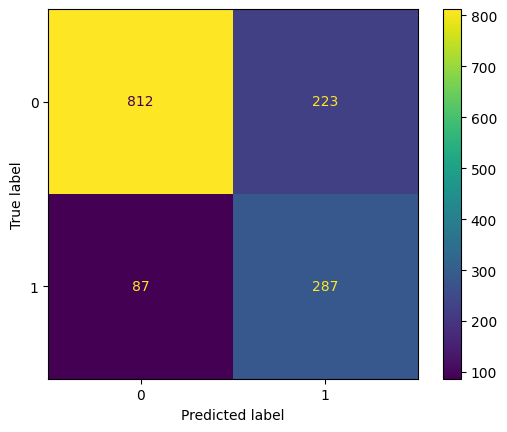

In [90]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# predecir probabilidades de la clase positiva (columna 1)
probas = modelo_forest.predict_proba(X_test)[:, 1]

# aplicar umbral 0.3
y_pred_umbral = (probas >= 0.3).astype(int)

# métricas
print(classification_report(y_test, y_pred_umbral))

# matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_umbral);

### **Guardar el Modelo champion**

In [93]:
import joblib
umbral = 0.3
joblib.dump({'modelo': modelo_forest, 'encoder': enc, 'umbral': umbral},
            'modelo_champion.pkl')

['modelo_champion.pkl']

### **Cargar Modelo Champion**

In [198]:
def predecir_nuevo_registro(registro):
    champ  = joblib.load('modelo_champion.pkl')
    modelo = champ['modelo']
    enc    = champ['encoder']
    umbral = champ['umbral']

    nuevo_prep = preparar_binarios(registro)
    Z          = enc.transform(nuevo_prep)

    p    = modelo.predict_proba(Z)[:, 1][0]
    pred = int(p >= umbral)

    resultado = registro.copy()
    resultado['prob_evade'] = p
    resultado['pred_evade'] = pred

    display(resultado)
    print('\n\n***********************************************************************************')
    print('********************** DECISIÓN PREDICHA: ', 'CLIENTE EVADE (1)'  ' **********************' if pred == 1 else 'CLIENTE PERMANECE (0)' ' ******************')
    print('***********************************************************************************')


### **Probando el modelo con nuevos registros**

#### **Primer Nuevo Registro**

In [203]:
# Nuevo registro para probar su comportamiento
nuevo_registro = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'No',
    'TienePareja': 'No',       # no tiene pareja ni dependientes
    'Dependientes': 'No',
    'MesesAntiguedad': 11,     # antiguedad baja
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'No',           # sin servicios extras activados
    'RespaldoEnLinea': 'No',
    'ProteccionDispositivo': 'No',
    'SoporteTecnico': 'No',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'No',
    'TipoContrato': 'Mensual',
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Cheque por correo',
    'CuentasDiarias': 2.15,
    'CargoMensual': 64.76,
    'CargoTotal': 712.36
}])
nuevo_registro

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,Masculino,No,No,No,11,Sí,No,Fibra óptica,No,No,No,No,No,No,Mensual,Sí,Cheque por correo,2.15,64.76,712.36


In [204]:
predecir_nuevo_registro(nuevo_registro)

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,...,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal,prob_evade,pred_evade
0,Masculino,No,No,No,11,Sí,No,Fibra óptica,No,No,...,No,No,Mensual,Sí,Cheque por correo,2.15,64.76,712.36,0.338748,1




***********************************************************************************
********************** DECISIÓN PREDICHA:  CLIENTE EVADE (1) **********************
***********************************************************************************


#### **Segundo Nuevo Registro**

In [135]:
nuevo_registro2 = pd.DataFrame([{
    'Genero': 'Femenino',
    'AdultoMayor': 'No',
    'TienePareja': 'Sí',
    'Dependientes': 'Sí',
    'MesesAntiguedad': 60,                         # antigüedad alta
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'No',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'Sí',                      # servicios activados
    'RespaldoEnLinea': 'Sí',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'Sí',
    'StreamingTV': 'No',
    'StreamingPeliculas': 'No',
    'TipoContrato': 'Dos años',                    # contrato largo
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Tarjeta de crédito (automático)',  # pago automático
    'CuentasDiarias': 1.53,
    'CargoMensual': 45.90,
    'CargoTotal': 2754.00
}])

nuevo_registro2

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,Femenino,No,Sí,Sí,60,Sí,No,Fibra óptica,Sí,Sí,Sí,Sí,No,No,Dos años,Sí,Tarjeta de crédito (automático),1.53,45.9,2754.0


In [200]:
predecir_nuevo_registro(nuevo_registro2)

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,...,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal,prob_evade,pred_evade
0,Femenino,No,Sí,Sí,60,Sí,No,Fibra óptica,Sí,Sí,...,No,No,Dos años,Sí,Tarjeta de crédito (automático),1.53,45.9,2754.0,0.088675,0




***********************************************************************************
********************** DECISIÓN PREDICHA:  CLIENTE PERMANECE (0) ******************
***********************************************************************************


In [269]:
nuevo_registro3 = pd.DataFrame([{
    'Genero': 'Masculino',
    'AdultoMayor': 'Sí',
    'TienePareja': 'Sí',
    'Dependientes': 'Sí',
    'MesesAntiguedad': 17,                         # antigüedad alta
    'ServicioTelefonico': 'Sí',
    'LineasMultiples': 'Sí',
    'ServicioInternet': 'Fibra óptica',
    'SeguridadEnLinea': 'Sí',                      # servicios activados
    'RespaldoEnLinea': 'Sí',
    'ProteccionDispositivo': 'Sí',
    'SoporteTecnico': 'Sí',
    'StreamingTV': 'Sí',
    'StreamingPeliculas': 'Sí',
    'TipoContrato': 'Mensual',                    # contrato largo
    'FacturaElectronica': 'Sí',
    'MetodoPago': 'Tarjeta de crédito (automático)',  # pago automático
    'CuentasDiarias': 1.53,
    'CargoMensual': 45.90,
    'CargoTotal': 2754.00
}])

nuevo_registro2

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,Femenino,No,Sí,Sí,60,Sí,No,Sin Servicio de internet,Sí,Sí,Sí,Sí,No,No,Dos años,Sí,Tarjeta de crédito (automático),1.53,45.9,2754.0


In [270]:
predecir_nuevo_registro(nuevo_registro3)

,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadEnLinea,RespaldoEnLinea,...,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal,prob_evade,pred_evade
0,Masculino,Sí,Sí,Sí,17,Sí,Sí,Fibra óptica,Sí,Sí,...,Sí,Sí,Mensual,Sí,Tarjeta de crédito (automático),1.53,45.9,2754.0,0.354085,1




***********************************************************************************
********************** DECISIÓN PREDICHA:  CLIENTE EVADE (1) **********************
***********************************************************************************


In [272]:
import joblib, pandas as pd, numpy as np

# cargar champion
champ  = joblib.load('modelo_champion.pkl')
modelo = champ['modelo']
enc    = champ['encoder']

# nombres de features del one-hot usado para entrenar
try:
    feature_names = enc.get_feature_names_out()
except TypeError:
    feature_names = enc.get_feature_names_out(enc.feature_names_in_)

# 1) importancias por feature (árbol/forest usa .feature_importances_; si no, usa permutation)
def importancias_por_feature(modelo, feature_names, X_val=None, y_val=None, n_repeats=10):
    if hasattr(modelo, "feature_importances_"):
        imp = modelo.feature_importances_
    else:
        from sklearn.inspection import permutation_importance
        if X_val is None or y_val is None:
            raise ValueError("Necesitas X_val e y_val para permutation_importance.")
        res = permutation_importance(modelo, X_val, y_val, n_repeats=n_repeats, n_jobs=-1, random_state=5)
        imp = res.importances_mean
    df = (pd.DataFrame({"feature": feature_names, "importance": imp})
            .sort_values("importance", ascending=False)
            .reset_index(drop=True))               # <<< quita los números de la izquierda
    return df

top = importancias_por_feature(modelo, feature_names)  # o pasa X_val, y_val si no es árbol
display(top.head(15))

,feature,importance
0,CargoTotal,0.156645
1,MesesAntiguedad,0.153304
2,TipoContrato_Mensual,0.127294
3,CargoMensual,0.120417
4,CuentasDiarias,0.102195
5,ServicioInternet_Fibra óptica,0.062280
6,SoporteTecnico,0.025247
7,SeguridadEnLinea,0.024405
8,ServicioInternet_No,0.021964
9,FacturaElectronica,0.021864


**Importancia de variables (modelo campeón)**

* Se calculó la relevancia por *feature* usando el mismo *encoder* con el que se entrenó el **Random Forest** campeón. La métrica de importancia corresponde a la contribución promedio a la reducción de impureza (no indica dirección “+”/“–”, solo “qué tanto usa” el modelo esa variable para separar clases).

**Top-features (según importancia relativa)**

1) **CargoTotal** — señal más fuerte: clientes con historiales de cobro acumulado “extremo” ayudan a separar bien las clases.  
2) **MesesAntiguedad** — la permanencia/antigüedad aporta mucha información para decidir.  
3) **TipoContrato_Mensual** — el *dummy* de “Mensual” es muy utilizado por el modelo (en RF esto suele ocurrir cuando *Mensual* concentra gran parte de los casos de evasión).  
4) **CargoMensual** — niveles del pago mensual ayudan a dividir la población.  
5) **CuentasDiarias** — intensidad de uso/facturación diaria contribuye de forma relevante.  
6) **ServicioInternet_Fibra óptica** — la presencia de fibra aporta diferenciación frente a la categoría base.  
7) **SoporteTecnico**, **SeguridadEnLinea** — disponibilidad de servicios/soporte agrega poder separador.  
8) **ServicioInternet_No** — la ausencia de internet también es informativa.  
9) **FacturaElectronica**, **Dependientes**, **AdultoMayor**, **TienePareja**, **RespaldoEnLinea**, **Genero** — señales de menor peso, pero útiles en combinación.

**Cómo leer “TipoContrato_Mensual” alto**

* No significa que “Mensual retenga más”, sino que el *dummy* “Mensual” es un **corte muy útil** para el bosque (frecuente y correlacionado con la evasión en los datos).  
* Para ver **dirección** (qué categoría tiende a evadir/permanecer), se recomienda contrastar con la **probabilidad media de evasión por categoría** (vs. la categoría base del one-hot). En análisis exploratorios típicos, *Un año/Dos años* suelen mostrar menor probabilidad de evasión que *Mensual*.

**Hallazgos prácticos**

* Variables de **nivel de cobro** (CargoTotal, CargoMensual) y **trayectoria** (MesesAntiguedad) dominan la señal.  
* El **tipo de contrato** es clave: el dummy “Mensual” concentra mucha información (consistente con mayor churn en planes mensuales).  
* Servicios complementarios (**Soporte**, **Seguridad en línea**) aportan, aunque con menor peso.

**Recomendación de negocio**

* Enfocar *retención* en clientes con **contrato mensual**, **baja antigüedad** y **cargos elevados**.  
* Incentivar el **cambio a contratos de mayor duración** y **pago automático**, y promover **servicios de soporte/seguridad** en segmentos de riesgo para reducir la probabilidad de evasión.


### **Conclusiones Finales**

**Modelo seleccionado y evaluación final**

* Con validación cruzada estratificada (k=10, shuffle=True, random_state=5) se seleccionó **Random Forest** por su mejor *recall* promedio y menor variabilidad. En la evaluación final se utilizó un **umbral de decisión = 0.30** para “Evade = 1”.

**Resumen de CV (k=10)**

* **Random Forest**
  - Precisión media (accuracy): **0.759**
  - Recall medio (Evade): **0.767**
  - IC Recall (≈ media ± 2·STD): **[0.702, 0.832]**
  - STD Recall: **0.032**

* **Regresión Logística**
  - Precisión media (accuracy): **0.762**
  - Recall medio (Evade): **0.753**
  - IC Recall: **[0.681, 0.823]**
  - STD Recall: **0.036**

* **Árbol de Decisión**
  - Precisión media (accuracy): **0.736**
  - Recall medio (Evade): **0.681**
  - IC Recall: **[0.581, 0.781]**
  - STD Recall: **0.050**

**Evaluación en conjunto de prueba (`X_test`, `y_test`) con umbral 0.30**

> * **Matriz de confusión:** `[[812 223], [87 287]]`  
> * **Accuracy global:** **0.78**  
> * **Clase 0 (Permanece):** precision **0.90**, recall **0.78**, f1 **0.84**, support **1035**  
> * **Clase 1 (Evade):** precision **0.56**, recall **0.77**, f1 **0.65**, support **374**  
> * **Macro avg:** precision **0.73**, recall **0.78**, f1 **0.74**  
> * **Weighted avg:** precision **0.81**, recall **0.78**, f1 **0.79**

**Persistencia del modelo**

* Se guardó **`modelo_champion.pkl`** con:
  - `modelo`: Random Forest entrenado
  - `encoder`: transformador usado en el preprocesamiento
  - `umbral`: **0.30**

**Scoring de un nuevo registro (ejemplo)**

> Tras cargar el artefacto y aplicar el mismo *encoder*, se obtuvo la probabilidad y la predicción con el umbral 0.30.  
> **Decisión predicha:** *Cliente Evade (1)*.

**Conclusión**

* Los resultados en *test* confirman la CV: **Random Forest** mantiene **recall alto (~0.77)** con precisión moderada en *Evade*, adecuado para **priorizar la detección de evasores**.  
* El *pipeline* queda listo para uso: **modelo + encoder + umbral** y flujo de *scoring* replicable para nuevos clientes.
